In [1]:
from futu import *
############################ 全局变量设置 ############################
FUTUOPEND_ADDRESS = '127.0.0.1'  # FutuOpenD 监听地址
FUTUOPEND_PORT = 11111  # FutuOpenD 监听端口

TRADING_ENVIRONMENT = TrdEnv.SIMULATE  # 交易环境：真实 / 模拟
TRADING_PWD = '914138'  # 交易密码，用于解锁交易
# TRADING_PERIOD = KLType.K_1M  # 信号 K 线周期
TRADING_PERIOD = KLType.K_DAY
TRADING_SECURITY = 'HK.00700'  # 交易标的
# FAST_MOVING_AVERAGE = 5  # 均线快线的周期
# SLOW_MOVING_AVERAGE = 10  # 均线慢线的周期
SUBSCRIBE_NUM_THRESHOLD = 20
quote_context = OpenQuoteContext(
    host=FUTUOPEND_ADDRESS, port=FUTUOPEND_PORT)  # 行情对象
trade_context = OpenHKTradeContext(
    host=FUTUOPEND_ADDRESS, port=FUTUOPEND_PORT,
    security_firm=SecurityFirm.FUTUSECURITIES)  # 交易对象，根据交易标的修改交易对象类型

2023-03-13 17:55:31,773 | 6472 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=1, host=127.0.0.1, port=11111, user_id=16767859
2023-03-13 17:55:31,773 | 6472 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=2, host=127.0.0.1, port=11111, user_id=16767859


### Function for querying daily data via FUTU API with one single stock code

In [2]:
def query_data(code, start_time, end_time, quote_context: OpenQuoteContext):
    try:
        ret, data, page_req_key = quote_context.request_history_kline(code, start=start_time, end=end_time, 
                                                                          max_count=1000, ktype=SubType.K_DAY, 
                                                                          autype=AuType.NONE)
        data = data.set_index('time_key')
        return data
    except Exception as e:
        print(e)

In [3]:
code = "HK.03606"
# code = "HK.01316"
# code = "HK.00425"
# code= "HK.00241"
# code = "HK.06862"
# code = "HK.00960"
# code = "HK.01209"
# code = "HK.00293"
start_time = "2021-01-01"
end_time = datetime.now().strftime("%Y-%m-%d")
data = query_data(code, start_time, end_time, quote_context=quote_context)
data

,code,open,close,high,low,pe_ratio,turnover_rate,volume,turnover,change_rate,last_close
time_key,,,,,,,,,,,
2021-01-04 00:00:00,HK.03606,42.70,45.15,46.05,42.70,35.495,0.01024,5178000,234047430.0,5.985915,42.60
2021-01-05 00:00:00,HK.03606,45.30,45.45,46.50,44.85,35.731,0.01803,9116000,415210030.0,0.664452,45.15
2021-01-06 00:00:00,HK.03606,45.45,44.15,45.45,43.60,34.709,0.01055,5336181,235168315.0,-2.860286,45.45
2021-01-07 00:00:00,HK.03606,44.15,43.95,44.55,43.35,34.551,0.00745,3764984,165775959.0,-0.453001,44.15
2021-01-08 00:00:00,HK.03606,44.55,45.80,47.35,44.50,36.006,0.01542,7795152,358387431.0,4.209329,43.95
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07 00:00:00,HK.03606,35.95,35.75,36.50,35.45,24.253,0.00241,1464367,52642721.0,-1.650619,36.35
2023-03-08 00:00:00,HK.03606,35.50,35.55,35.65,35.10,24.118,0.00185,1125416,39793031.0,-0.559441,35.75
2023-03-09 00:00:00,HK.03606,35.10,34.75,35.50,34.65,23.575,0.00162,982850,34465967.0,-2.250352,35.55


In [4]:
data[:14]

,code,open,close,high,low,pe_ratio,turnover_rate,volume,turnover,change_rate,last_close
time_key,,,,,,,,,,,
2021-01-04 00:00:00,HK.03606,42.70,45.15,46.05,42.70,35.495,0.01024,5178000,234047430.0,5.985915,42.60
2021-01-05 00:00:00,HK.03606,45.30,45.45,46.50,44.85,35.731,0.01803,9116000,415210030.0,0.664452,45.15
2021-01-06 00:00:00,HK.03606,45.45,44.15,45.45,43.60,34.709,0.01055,5336181,235168315.0,-2.860286,45.45
2021-01-07 00:00:00,HK.03606,44.15,43.95,44.55,43.35,34.551,0.00745,3764984,165775959.0,-0.453001,44.15
2021-01-08 00:00:00,HK.03606,44.55,45.80,47.35,44.50,36.006,0.01542,7795152,358387431.0,4.209329,43.95
2021-01-11 00:00:00,HK.03606,45.15,52.25,53.70,45.15,41.077,0.02243,11340751,584339148.0,14.082969,45.80
2021-01-12 00:00:00,HK.03606,52.20,50.00,52.20,48.50,39.308,0.01458,7371577,369740371.0,-4.306220,52.25
2021-01-13 00:00:00,HK.03606,49.60,50.40,53.60,49.60,39.622,0.02080,10515600,538911968.0,0.800000,50.00
2021-01-14 00:00:00,HK.03606,50.65,48.80,50.95,47.65,38.364,0.01418,7168982,349793515.0,-3.174603,50.40


### import math library to run numbers

In [5]:
import talib
import numpy as np

### stochastic oscillator calculation (KDJ)

In [6]:
params = {
    "default": {
        "fastk_period": 10,
        "slowk_period": 3,
        "slowd_period": 3,
        "fastd_period": 3,
        "slowk_matype": 0,
        "slowd_matype": 0,
        "fastd_matype": 0,
        "rsi_period": 10
    },
    "HK.03606": {
        "fastk_period": 10,
        "slowk_period": 3,
        "slowd_period": 3,
        "fastd_period": 3,
        "slowk_matype": 0,
        "slowd_matype": 0,
        "fastd_matype": 0,
        "rsi_period": 10
    },
    "HK.01316": {
        "fastk_period": 7,
        "slowk_period": 3,
        "slowd_period": 3,
        "fastd_period": 3,
        "slowk_matype": 0,
        "slowd_matype": 0,
        "fastd_matype": 0,
        "rsi_period": 5
    },
    "HK.00241": {
        "fastk_period": 7,
        "slowk_period": 3,
        "slowd_period": 3,
        "fastd_period": 3,
        "slowk_matype": 0,
        "slowd_matype": 0,
        "fastd_matype": 0,
        "rsi_period": 5
    },
    "HK.01209": {
        "fastk_period": 7,
        "slowk_period": 3,
        "slowd_period": 3,
        "fastd_period": 3,
        "slowk_matype": 0,
        "slowd_matype": 0,
        "fastd_matype": 0,
        "rsi_period": 5
    },
}

In [7]:
# according to wikipedia, fastk_period with 5 to help calculate recent 5 days highest and lowest

if code in params:
    print("try to get {} params".format(code))
    fastk_period = params[code]["fastk_period"]
    slowk_period = params[code]["slowk_period"]
    slowd_period = params[code]["slowd_period"]
    fastd_period = params[code]["fastd_period"]
    slowk_matype = params[code]["slowk_matype"]
    slowd_matype = params[code]["slowd_matype"]
    fastd_matype = params[code]["fastd_matype"]
else:
    print("try to get default params")
    fastk_period = params["default"]["fastk_period"]
    slowk_period = params["default"]["slowk_period"]
    slowd_period = params["default"]["slowd_period"]
    fastd_period = params["default"]["fastd_period"]
    slowk_matype = params["default"]["slowk_matype"]
    slowd_matype = params["default"]["slowd_matype"]
    fastd_matype = params["default"]["fastd_matype"]

slowk, slowd = talib.STOCH(
    high=data['high'], low=data['low'], close=data['close'], 
    fastk_period=fastk_period, slowk_period=slowk_period, slowd_period=slowd_period,
    slowk_matype=slowk_matype, slowd_matype=slowd_matype)
fastk, fastd = talib.STOCHF(
    high=data['high'], low=data['low'], close=data['close'],
    fastk_period=fastk_period, fastd_period=fastd_period,
    fastd_matype = fastd_matype 
)

try to get HK.03606 params


SLOWK Line (MA smoothed FASTK over slowk period),
because fastk period = 5, and slowk period = 3, to get a slowk value 
at least fastk+slowk-1 trading days, and SLOWD Line (MA smoothed SLOWK over slowd period)
needs more slowd-1 days. So index begin with 2021-01-14.

In [8]:
print(slowk[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00          NaN
2021-01-20 00:00:00          NaN
2021-01-21 00:00:00    90.732310
2021-01-22 00:00:00    88.035707
2021-01-25 00:00:00    90.125565
2021-01-26 00:00:00    86.125498
2021-01-27 00:00:00    82.012195
2021-01-28 00:00:00    68.394309
2021-01-29 00:00:00    57.925461
dtype: float64


In [9]:
print(fastk[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00    95.734597
2021-01-20 00:00:00    87.937743
2021-01-21 00:00:00    88.524590
2021-01-22 00:00:00    87.644788
2021-01-25 00:00:00    94.207317
2021-01-26 00:00:00    76.524390
2021-01-27 00:00:00    75.304878
2021-01-28 00:00:00    53.353659
2021-01-29 00:00:00    45.117845
dtype: float64


In [10]:
print(slowd[:20])


time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00          NaN
2021-01-20 00:00:00          NaN
2021-01-21 00:00:00    84.084663
2021-01-22 00:00:00    88.693029
2021-01-25 00:00:00    89.631194
2021-01-26 00:00:00    88.095590
2021-01-27 00:00:00    86.087753
2021-01-28 00:00:00    78.844001
2021-01-29 00:00:00    69.443988
dtype: float64


In [11]:
print(fastd[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00    74.210610
2021-01-20 00:00:00    87.311070
2021-01-21 00:00:00    90.732310
2021-01-22 00:00:00    88.035707
2021-01-25 00:00:00    90.125565
2021-01-26 00:00:00    86.125498
2021-01-27 00:00:00    82.012195
2021-01-28 00:00:00    68.394309
2021-01-29 00:00:00    57.925461
dtype: float64


### RSI Calculation

In [12]:
if code in params:
    rsi_period = params[code]["rsi_period"]
else:
    rsi_period = params["default"]["rsi_period"]

rsi = talib.RSI(data['close'], timeperiod=rsi_period)
rsi[:15]

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00    67.027027
2021-01-19 00:00:00    70.563003
2021-01-20 00:00:00    72.527106
2021-01-21 00:00:00    73.587741
2021-01-22 00:00:00    75.525918
dtype: float64

### MACD Calculation

In [13]:
# macd_fastperiod  = 12
# macd_slowperiod = 26
# macd_signalperiod = 9
macd_fastperiod  = 10
macd_slowperiod = 22
macd_signalperiod = 7

In [14]:
macd, macdsignal, macdhist = talib.MACD(data['close'], fastperiod=macd_fastperiod, slowperiod=macd_slowperiod, signalperiod=macd_signalperiod)

### Import Plotting Lib

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

### Date formatting before drawing graphs

In [16]:
fastk.index = pd.to_datetime(fastk.index, format="%Y-%m-%d")
fastd.index = pd.to_datetime(fastd.index, format="%Y-%m-%d")
slowk.index = pd.to_datetime(slowk.index, format="%Y-%m-%d")
slowd.index = pd.to_datetime(slowd.index, format="%Y-%m-%d")

rsi.index = pd.to_datetime(rsi.index, format="%Y-%m-%d")
macd.index = pd.to_datetime(macd.index, format="%Y-%m-%d")
macdsignal.index = pd.to_datetime(macdsignal.index, format="%Y-%m-%d")

data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

In [17]:
data['close'][-100:]

time_key
2022-10-17    31.55
2022-10-18    32.05
2022-10-19    31.10
2022-10-20    30.40
2022-10-21    30.80
              ...  
2023-03-07    35.75
2023-03-08    35.55
2023-03-09    34.75
2023-03-10    33.55
2023-03-13    33.60
Name: close, Length: 100, dtype: float64

In [18]:
print(macd.loc['2022-02-04'])
print(macdsignal.loc['2022-02-04'])

0.22740002924700065
0.5453532123694278


In [19]:
import pandas as pd
slowk.index
print("2021-01-04" in slowk.index)
print(slowk.loc['2022-01-04'])
k = slowk.loc['2022-01-04']
d = slowd.loc['2022-01-04']
rsi_val = rsi.loc['2022-01-04']
text = "K: {}, D: {}, RSI: {}".format(k, d, rsi)
print(text)

True
50.41196216051259
K: 50.41196216051259, D: 49.17946631404059, RSI: time_key
2021-01-04          NaN
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
                ...    
2023-03-07    39.561963
2023-03-08    37.617988
2023-03-09    30.875193
2023-03-10    23.773193
2023-03-13    24.576395
Length: 540, dtype: float64


### Data Visualization

<IPython.core.display.Javascript object>


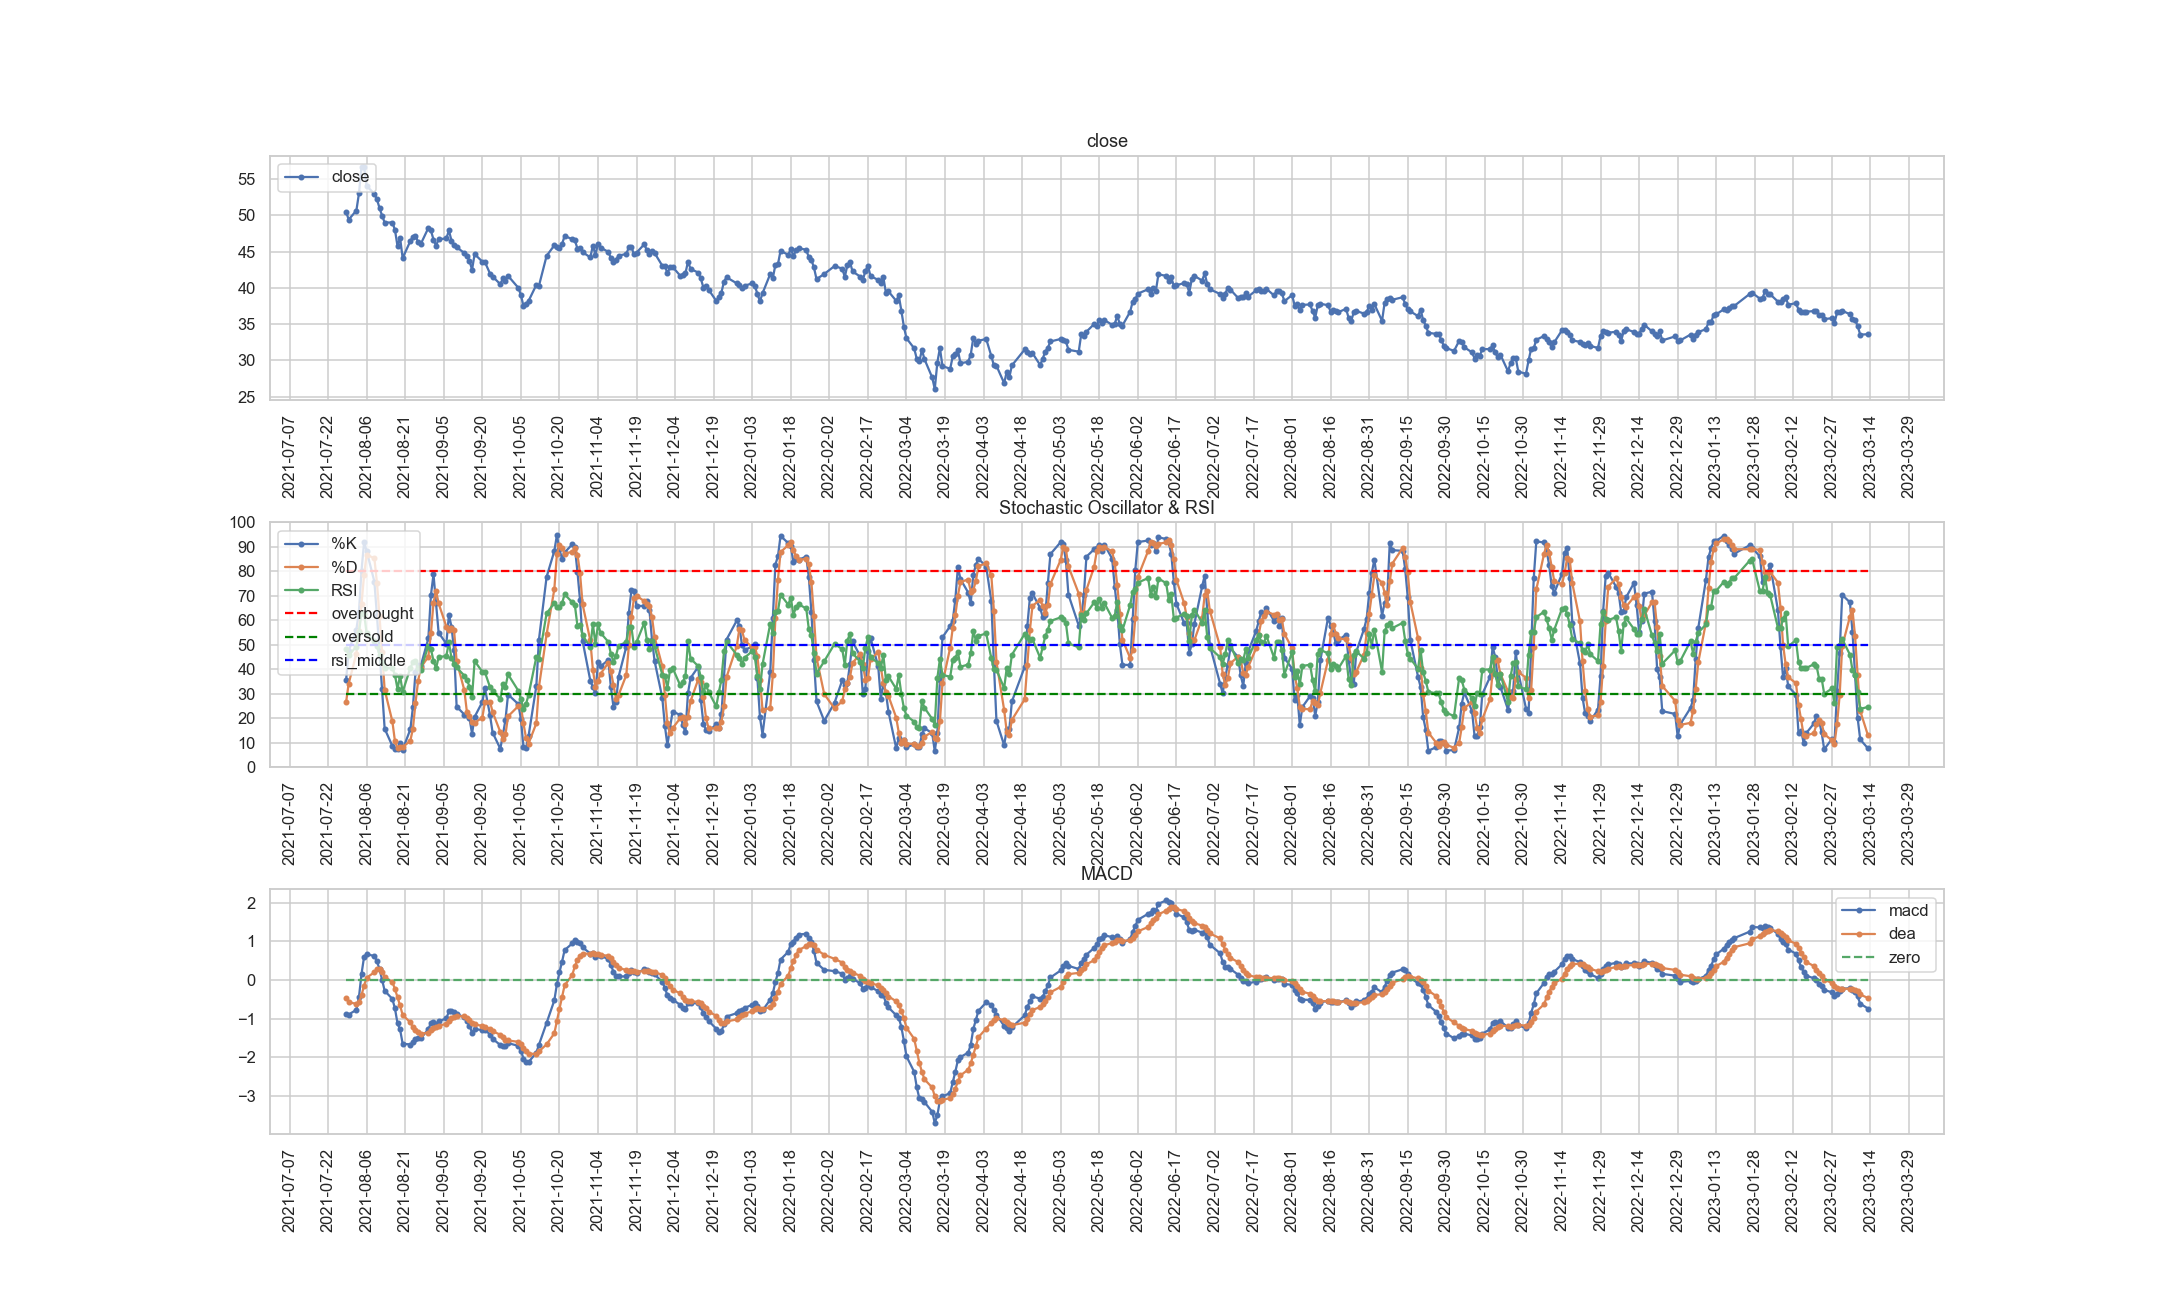

In [33]:
%matplotlib notebook
import matplotlib.dates as mdates

n = 400
overbought_threshold = 80
overbought = np.empty(n)
overbought.fill(overbought_threshold)

oversold_threshold= 30
oversold = np.empty(n)
oversold.fill(oversold_threshold)

rsi_middle_line = np.empty(n)
rsi_middle_line.fill(50)

macd_zero_line = np.empty(n)
macd_zero_line.fill(0.0)

# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["font.size"] = "16"
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)

ax0 = plt.subplot(3, 1, 1)
fig = ax0.get_figure()
plt.xticks(rotation="vertical")
ax0.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(data.index[-n:], data['close'][-n:], label="close", marker=".")
plt.legend(loc="upper left")
plt.title("close")
annotation0 = ax0.annotate(
    "",
    xy=(0,0),
    xytext=(20,20),
    textcoords="offset points",
    bbox={'boxstyle': 'round', 'fc': 'w'},
    arrowprops={'arrowstyle': '->', 'color': 'black'}
)
annotation0.set_visible(False)

ax1 = plt.subplot(3, 1, 2, sharex = ax0)
plt.xticks(rotation="vertical")
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.yticks(np.arange(0, 110, 10))
plt.ylim(0, 100)
plt.plot(slowk.index[-n:], slowk[-n:], label="%K", marker=".")
plt.plot(slowd.index[-n:], slowd[-n:], label="%D", marker=".")
plt.plot(rsi.index[-n:], rsi[-n:], label="RSI", marker=".")
plt.plot(slowk.index[-n:], overbought, label="overbought", color="red", linestyle="dashed")
plt.plot(slowk.index[-n:], oversold, label="oversold", color="green", linestyle="dashed")
plt.plot(rsi.index[-n:], rsi_middle_line, label="rsi_middle", color="blue", linestyle="dashed")
plt.legend(loc="upper left")
plt.title("Stochastic Oscillator & RSI")
annotation1 = ax1.annotate(
    "",
    xy=(0,0),
    xytext=(20,20),
    textcoords="offset points",
    bbox={'boxstyle': 'round', 'fc': 'w'},
    arrowprops={'arrowstyle': '->', 'color': 'black'}
)
annotation1.set_visible(False)

ax2 = plt.subplot(3, 1, 3, sharex = ax0)
plt.xticks(rotation="vertical")
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(macd.index[-n:], macd[-n:], label="macd", marker=".")
plt.plot(macdsignal.index[-n:], macdsignal[-n:], label="dea", marker=".")
plt.plot(macd.index[-n:], macd_zero_line[-n:], label="zero", linestyle="dashed")
plt.legend()
plt.title("MACD")
annotation2 = ax2.annotate(
    "",
    xy=(0,0),
    xytext=(20,20),
    textcoords="offset points",
    bbox={'boxstyle': 'round', 'fc': 'w'},
    arrowprops={'arrowstyle': '->', 'color': 'black'}
)
annotation2.set_visible(False)

def update_annotation_zero(line, ind):
    x,y = line.get_data()
    annotation0.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    dt_64 = x[ind["ind"][0]]
    ts = pd.to_datetime(str(dt_64)) 
    dt = ts.strftime('%Y-%m-%d')
    if dt in data.index:
        close_val = data['close'][dt]
        text = "Date: %s\n close: %.2f" % (dt, close_val)
        annotation0.set_text(text)
        annotation0.get_bbox_patch().set_alpha(0.4)

def update_annotation_one(line, ind):
    x,y = line.get_data()
    annotation1.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    dt_64 = x[ind["ind"][0]]
    ts = pd.to_datetime(str(dt_64)) 
    dt = ts.strftime('%Y-%m-%d')
    if (dt in slowk.index):
        k = slowk.loc[dt]
        d = slowd.loc[dt]
        rsi_val = rsi.loc[dt]
        text = "Date: %s\nK: %.2f\nD: %.2f\nRSI: %.2f" % (dt, k, d, rsi_val)
        annotation1.set_text(text)
        annotation1.get_bbox_patch().set_alpha(0.4)

def update_annotation_two(line, ind):
    x,y = line.get_data()
    annotation2.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    dt_64 = x[ind["ind"][0]]
    ts = pd.to_datetime(str(dt_64)) 
    dt = ts.strftime('%Y-%m-%d')
    if dt in macd.index:
        macd_val = macd.loc[dt]
        macdsignal_val = macdsignal.loc[dt]
        text = "Date: %s\nMACD: %.2f\nMACD_SIGNAL: %.2f" % (dt, macd_val, macdsignal_val)
        annotation2.set_text(text)
        annotation2.get_bbox_patch().set_alpha(0.4)

def motion_hover_plot(event):
    lines_0 = ax0.get_lines()
    annotation_visibility0 = annotation0.get_visible()
    lines_1 = ax1.get_lines()
    annotation_visibility1 = annotation1.get_visible()
    lines_2 = ax2.get_lines()
    annotation_visibility2 = annotation2.get_visible()
    
    if event.inaxes == ax0:
        for line in lines_0:
            cont, ind = line.contains(event)
            if cont:
                update_annotation_zero(line, ind)
                annotation0.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annotation_visibility0:
                    annotation0.set_visible(False)
                    fig.canvas.draw_idle()
    elif event.inaxes == ax1:
        for line in lines_1:
            cont, ind = line.contains(event)
            if cont:
                update_annotation_one(line, ind)
                annotation1.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annotation_visibility1:
                    annotation1.set_visible(False)
                    fig.canvas.draw_idle()
    elif event.inaxes == ax2:
        for line in lines_2:
            cont, ind = line.contains(event)
            if cont:
                update_annotation_two(line, ind)
                annotation2.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annotation_visibility2:
                    annotation2.set_visible(False)
                    fig.canvas.draw_idle() 
    
    else:
        pass
fig.canvas.mpl_connect("motion_notify_event", motion_hover_plot)
plt.show()

### Backtrader to Backtest

#### import backtrader libs

In [21]:
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.indicators as btind
import datetime
import pytz
from datetime import datetime, timezone

### Strategy Class

In [22]:
class StochRSIMacdCompStrategy(bt.Strategy):
    params = dict(
        stop_loss=0.5,
        fastk_period=10,
        slowk_period=3,
        slowd_period=3,
        overbought_threshold=80.0,
        oversold_threshold=30.0,
        rsi_period=10,
        macd_fastperiod=10,
        macd_slowperiod=22,
        macd_signalperiod=7,
        comp_period=5,
        stake=100,
    )

    def is_overbought(self):
        for i in range(-self.p.comp_period + 1, 1):
            if self.slowk[i] >= self.p.overbought_threshold and self.slowd[i] >= self.p.overbought_threshold:
                return True
            else:
                continue
        return False
    
    def is_oversold(self):
        for i in range(-self.p.comp_period + 1, 1):
            if self.slowk[i] <= self.p.oversold_threshold and self.slowd[i] <= self.p.oversold_threshold:
                return True
            else:
                continue
        return False
    
    def is_rsi_over_mid(self):
        for i in range(-self.p.comp_period + 1, 1):
            if self.rsi[i] > 50.0:
                return True
            else:
                continue
        return False

    def is_rsi_under_mid(self):
        for i in range(-self.p.comp_period + 1, 1):
            if self.rsi[i] < 50.0:
                return True
            else:
                continue
        return False

    def is_macd_over_macdsignal(self):
        if self.macd[0] > self.macdsignal[0]:
            return True
        else:
            return False
    
    def is_macd_under_macdsignal(self):
        if self.macd[0] < self.macdsignal[0]:
            return True
        else:
            return False
        
    def __init__(self):
        self.orderid = None
        stoch = bt.talib.STOCH(
            self.data.high, self.data.low, self.data.close, 
            fastk_period=self.p.fastk_period, 
            slowk_period=self.p.slowk_period, 
            slowd_period=self.p.slowd_period)
        self.slowk = stoch.slowk
        self.slowd = stoch.slowd
        self.rsi  = bt.talib.RSI(self.data, timeperiod=self.p.rsi_period)
        macdlines = bt.talib.MACD(
            self.data, 
            fastperiod=self.p.macd_fastperiod, 
            slowperiod=self.p.macd_slowperiod, 
            signalperiod=self.p.macd_signalperiod)
        self.macd = macdlines.macd 
        self.macdsignal = macdlines.macdsignal
        self.macdhist = macdlines.macdhist

    def calculate_quantity(self, portfolio_value, close):
        self.log("portfolio_value: {}, close: {}, stake: {}".format(portfolio_value, close, self.p.stake))
        quantity = int(portfolio_value / close)
        quantity = int(quantity / self.p.stake) * self.p.stake
        return quantity

    def next(self):
        dt = self.data.datetime.date()
        portfolio_value = self.broker.get_value()
        possize = self.getposition(self.data, self.broker).size
        cash = self.broker.cash
#         self.log('stop_loss: %.2f' % self.stop_loss)
        self.log('cash: %.2f' % cash)
        self.log('Data %s Close: %.2f' % (self.data._name, self.data.close[0]))
        self.log('%04d - %s - Data Position Size:  %02d - Value %.2f' %
              (len(self), dt.isoformat(), possize, portfolio_value))
        self.log("slowk: %.2f, slowd: %.2f, rsi: %.2f, macd: %.2f, macdsignal: %.2f " % (
            self.slowk[0], self.slowd[0], self.rsi[0], self.macd[0], self.macdsignal[0]))
        self.log("rsi over mid: %r" % (self.is_rsi_over_mid()))
        self.log("rsi under mid : %r" % (self.is_rsi_under_mid()))
        self.log("overbought: %r" % (self.is_overbought()))
        self.log("oversold: %r" % (self.is_oversold()))
        self.log("macd over macdsignal: %r" % (self.is_macd_over_macdsignal()))
        self.log("macd under macdsignal: %r" % (self.is_macd_under_macdsignal()))
        if self.orderid:
            return
        
        # TODO stop_loss
        # STOP_LOSS 
        
        if  not (self.p.stop_loss is None) and \
            ((self.broker.getvalue() - self.broker.startingcash) / self.broker.startingcash >= self.p.stop_loss \
            or (self.broker.getvalue() - self.broker.startingcash) / self.broker.startingcash <= - self.p.stop_loss) and \
            possize > 0:
            self.log('STOP LOSS, SELL SIGNAL')
            order = self.order_target_percent(self.data, 0)
            self.log('%s - %s - OrderNo: %s - Order Target Percent: %.2f' % (self.data._name, dt.isoformat(), order, 0))
            return
        # buy
        if self.is_rsi_over_mid() and self.is_oversold() and self.is_macd_over_macdsignal():
            self.log("BUY SIGNAL!") 
            if possize == 0:
                quantity = self.calculate_quantity(portfolio_value, self.data.close[0])
                self.buy(data=self.data, size=quantity)
                self.log('BUY CREATE %s, price = %.2f, qty = %d' % (self.data._name, self.data.close[0], quantity))
        # sell
#         if self.is_rsi_under_mid() and self.is_overbought() and self.is_macd_under_macdsignal() and possize > 0:
        if self.is_rsi_under_mid() and (not self.is_oversold()) and self.is_macd_under_macdsignal():
            self.log("SELL SIGNAL!")
            if possize > 0:
                order = self.order_target_percent(self.data, 0)
                self.log('%s - %s - OrderNo: %s - Order Target Percent: %.2f' % (self.data._name, dt.isoformat(), order, 0))

    def notify_order(self, order):
        pass

    def log(self, txt, dt=None):
        dt = dt or self.data.datetime[0]
        dt = bt.num2date(dt)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def stop(self):
        self.log('==================================================')
        self.log('Starting Value - %.2f' % self.broker.startingcash)
        self.log('Ending   Value - %.2f' % self.broker.getvalue())
        self.log('==================================================')

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

In [23]:
from collections import OrderedDict

class MultiStochRSIMacdCompStrategy(bt.Strategy):
    params = dict(
        stop_loss=0.5,
        fastk_period=10,
        slowk_period=3,
        slowd_period=3,
        overbought_threshold=80.0,
        oversold_threshold=30.0,
        rsi_period=10,
        macd_fastperiod=10,
        macd_slowperiod=22,
        macd_signalperiod=7,
        comp_period=5,
        stake=OrderedDict(),
        ind_periods=OrderedDict(),
        order_amount_limit=30000
    )

    def is_overbought(self, slowk, slowd):
        for i in range(-self.p.comp_period + 1, 1):
            if slowk[i] >= self.p.overbought_threshold and slowd[i] >= self.p.overbought_threshold:
                return True
            else:
                continue
        return False
    
    def is_oversold(self, slowk, slowd):
        for i in range(-self.p.comp_period + 1, 1):
            if slowk[i] <= self.p.oversold_threshold and slowd[i] <= self.p.oversold_threshold:
                return True
            else:
                continue
        return False
    
    def is_rsi_over_mid(self, rsi):
        for i in range(-self.p.comp_period + 1, 1):
            if rsi[i] > 50.0:
                return True
            else:
                continue
        return False

    def is_rsi_under_mid(self, rsi):
        for i in range(-self.p.comp_period + 1, 1):
            if rsi[i] < 50.0:
                return True
            else:
                continue
        return False

    def is_macd_over_macdsignal(self, macd, macdsignal):
        if macd[0] > macdsignal[0]:
            return True
        else:
            return False
    
    def is_macd_under_macdsignal(self, macd, macdsignal):
        if macd[0] < macdsignal[0]:
            return True
        else:
            return False
        
    def __init__(self):
        self.orderid = None
        self.slowks = OrderedDict()
        self.slowds = OrderedDict()
        self.rsis = OrderedDict()
        self.macds = OrderedDict()
        self.macdsignals = OrderedDict()
        self.macdhists = OrderedDict()
        
        for i, data in enumerate(self.datas):
            code = data._name
            default_periods = self.p.ind_periods.get('default', OrderedDict())
            ind_periods = self.p.ind_periods.get(code, default_periods)
            # stochastic kdj
            fastk_period = ind_periods.get('fastk_period', self.p.fastk_period)
            slowk_period = ind_periods.get('slowk_period', self.p.slowk_period)
            slowd_period = ind_periods.get('slowd_period', self.p.slowd_period)
            # rsi
            rsi_period = ind_periods.get('rsi_period', self.p.rsi_period)
            # macd
            macd_fastperiod = ind_periods.get('macd_fastperiod', self.p.macd_fastperiod)
            macd_slowperiod = ind_periods.get('macd_slowperiod', self.p.macd_slowperiod)
            macd_signalperiod = ind_periods.get('macd_signalperiod', self.p.macd_signalperiod)
            stoch = bt.talib.STOCH(
                data.high, data.low, data.close, 
                fastk_period=fastk_period, 
                slowk_period=slowk_period, 
                slowd_period=slowd_period)
            self.slowks[code] = stoch.slowk
            self.slowds[code] = stoch.slowd
            self.rsis[code]  = bt.talib.RSI(data, timeperiod=rsi_period)
            macdlines = bt.talib.MACD(
                data, 
                fastperiod=macd_fastperiod, 
                slowperiod=macd_slowperiod, 
                signalperiod=macd_signalperiod)
            self.macds[code] = macdlines.macd 
            self.macdsignals[code] = macdlines.macdsignal
            self.macdhists[code] = macdlines.macdhist

    def adjust_order_amount(self, cash):
        amount = self.p.order_amount_limit if cash >= self.p.order_amount_limit else cash
        return amount

    def calculate_quantity(self, amount, close, stake):
        self.log("amount: {}, close: {}, stake: {}".format(amount, close, stake))
        quantity = int(amount / close)
        quantity = int(quantity / stake) * stake
        return quantity

    def per_next(self, data):
        dt = data.datetime.date()
        portfolio_value = self.broker.get_value()
        possize = self.getposition(data, self.broker).size
        cash = self.broker.cash
#         self.log('stop_loss: %.2f' % self.stop_loss)

        slowk = self.slowks[data._name]
        slowd = self.slowds[data._name]
        rsi = self.rsis[data._name]
        macd = self.macds[data._name]
        macdsignal = self.macdsignals[data._name]
        
        self.log('cash: %.2f' % cash)
        self.log('Data %s Close: %.2f' % (data._name, data.close[0]))
        self.log('%04d - %s - Data Position Size:  %02d - Value %.2f' %
              (len(data), dt.isoformat(), possize, portfolio_value))
        self.log("slowk: %.2f, slowd: %.2f, rsi: %.2f, macd: %.2f, macdsignal: %.2f " % (
            slowk[0], slowd[0], rsi[0], macd[0], macdsignal[0]))
        self.log("rsi over mid: %r" % (self.is_rsi_over_mid(rsi)))
        self.log("rsi under mid : %r" % (self.is_rsi_under_mid(rsi)))
        self.log("overbought: %r" % (self.is_overbought(slowk, slowd)))
        self.log("oversold: %r" % (self.is_oversold(slowk, slowd)))
        self.log("macd over macdsignal: %r" % (self.is_macd_over_macdsignal(macd, macdsignal)))
        self.log("macd under macdsignal: %r" % (self.is_macd_under_macdsignal(macd, macdsignal)))
        if self.orderid:
            return
        
        # TODO stop_loss
        # STOP_LOSS 
        
        if  not (self.p.stop_loss is None) and \
            ((self.broker.getvalue() - self.broker.startingcash) / self.broker.startingcash >= self.p.stop_loss \
            or (self.broker.getvalue() - self.broker.startingcash) / self.broker.startingcash <= - self.p.stop_loss) and \
            possize > 0:
            self.log('STOP LOSS, SELL SIGNAL')
            order = self.order_target_percent(data, 0)
            self.log('%s - %s - OrderNo: %s - Order Target Percent: %.2f' % (data._name, dt.isoformat(), order, 0))
            return
        # buy
        if self.is_rsi_over_mid(rsi) and self.is_oversold(slowk, slowd) and self.is_macd_over_macdsignal(macd, macdsignal):
            self.log('Data %s BUY SIGNAL!' % data._name) 
            if possize == 0:
                amount = self.adjust_order_amount(cash)
                quantity = self.calculate_quantity(amount, data.close[0], stakes.get(data._name, 100))
                self.buy(data=data, size=quantity)
                self.log('BUY CREATE %s, price = %.2f, qty = %d' % (data._name, data.close[0], quantity))
        # sell
#         if self.is_rsi_under_mid() and self.is_overbought() and self.is_macd_under_macdsignal() and possize > 0:
        if self.is_rsi_under_mid(rsi) and (not self.is_oversold(slowk, slowd)) and self.is_macd_under_macdsignal(slowk, slowd):
            self.log('Data %s SELL SIGNAL!' % data._name)
            if possize > 0:
                order = self.order_target_percent(data, 0)
                self.log('%s - %s - OrderNo: %s - Order Target Percent: %.2f' % (data._name, dt.isoformat(), order, 0))

    def next(self):
        for i, data in enumerate(self.datas):
            self.per_next(data)

    def notify_order(self, order):
        pass

    def log(self, txt, dt=None):
        dt = dt or self.data.datetime[0]
        dt = bt.num2date(dt)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def stop(self):
        self.log('==================================================')
        self.log('Starting Value - %.2f' % self.broker.startingcash)
        self.log('Ending   Value - %.2f' % self.broker.getvalue())
        self.log('==================================================')

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

In [24]:
from backtrader import CommInfoBase

class Futu_CommInfo(CommInfoBase):
    params = (
        ('stocklike', True),
        ('commtype', CommInfoBase.COMM_PERC),
    )

    def _getcommission(self, size, price, pseudoexec):
        return abs(size) * price * self.p.commission + 15

In [25]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)


import collections

import backtrader as bt
from backtrader.utils.py3 import items, iteritems

from backtrader.analyzers import TimeReturn, PositionsValue, Transactions, GrossLeverage


class CustPyFolio(bt.Analyzer):
    '''This analyzer uses 4 children analyzers to collect data and transforms it
    in to a data set compatible with ``pyfolio``

    Children Analyzer

      - ``TimeReturn``

        Used to calculate the returns of the global portfolio value

      - ``PositionsValue``

        Used to calculate the value of the positions per data. It sets the
        ``headers`` and ``cash`` parameters to ``True``

      - ``Transactions``

        Used to record each transaction on a data (size, price, value). Sets
        the ``headers`` parameter to ``True``

      - ``GrossLeverage``

        Keeps track of the gross leverage (how much the strategy is invested)

    Params:
      These are passed transparently to the children

      - timeframe (default: ``bt.TimeFrame.Days``)

        If ``None`` then the timeframe of the 1st data of the system will be
        used

      - compression (default: `1``)

        If ``None`` then the compression of the 1st data of the system will be
        used

    Both ``timeframe`` and ``compression`` are set following the default
    behavior of ``pyfolio`` which is working with *daily* data and upsample it
    to obtaine values like yearly returns.

    Methods:

      - get_analysis

        Returns a dictionary with returns as values and the datetime points for
        each return as keys
    '''
    params = (
        ('timeframe', bt.TimeFrame.Days),
        ('compression', 1)
    )

    def __init__(self):
        dtfcomp = dict(timeframe=self.p.timeframe,
                       compression=self.p.compression)

        self._returns = TimeReturn(**dtfcomp)
        self._positions = PositionsValue(headers=True, cash=True)
        self._transactions = Transactions(headers=True)
        self._gross_lev = GrossLeverage()

    def stop(self):
        super(CustPyFolio, self).stop()
        self.rets['returns'] = self._returns.get_analysis()
        self.rets['positions'] = self._positions.get_analysis()
        self.rets['transactions'] = self._transactions.get_analysis()
        self.rets['gross_lev'] = self._gross_lev.get_analysis()

    def get_pf_items(self):
        '''Returns a tuple of 4 elements which can be used for further processing with
          ``pyfolio``

          returns, positions, transactions, gross_leverage

        Because the objects are meant to be used as direct input to ``pyfolio``
        this method makes a local import of ``pandas`` to convert the internal
        *backtrader* results to *pandas DataFrames* which is the expected input
        by, for example, ``pyfolio.create_full_tear_sheet``

        The method will break if ``pandas`` is not installed
        '''
        # keep import local to avoid disturbing installations with no pandas
        import pandas
        from pandas import DataFrame as DF

        #
        # Returns
        cols = ['index', 'return']
        returns = DF.from_records(iteritems(self.rets['returns']),
                                  index=cols[0], columns=cols)
        returns.index = pandas.to_datetime(returns.index)
        returns.index = returns.index.tz_localize('UTC')
        rets = returns['return']
        #
        # Positions
        pss = self.rets['positions']
#         ps = [[k] + v[-2:] for k, v in iteritems(pss)]
        ps = [[k] + v[1:] for k, v in iteritems(pss)]
        cols = ps.pop(0)  # headers are in the first entry
        positions = DF.from_records(ps, index=cols[0], columns=cols)
        positions.index = pandas.to_datetime(positions.index)
        positions.index = positions.index.tz_localize('UTC')

        #
        # Transactions
        txss = self.rets['transactions']
        txs = list()
        # The transactions have a common key (date) and can potentially happend
        # for several assets. The dictionary has a single key and a list of
        # lists. Each sublist contains the fields of a transaction
        # Hence the double loop to undo the list indirection
        for k, v in iteritems(txss):
            for v2 in v:
                txs.append([k] + v2)

        cols = txs.pop(0)  # headers are in the first entry
        transactions = DF.from_records(txs, index=cols[0], columns=cols)
        transactions.index = pandas.to_datetime(transactions.index)
        transactions.index = transactions.index.tz_localize('UTC')

        # Gross Leverage
        cols = ['index', 'gross_lev']
        gross_lev = DF.from_records(iteritems(self.rets['gross_lev']),
                                    index=cols[0], columns=cols)

        gross_lev.index = pandas.to_datetime(gross_lev.index)
        gross_lev.index = gross_lev.index.tz_localize('UTC')
        glev = gross_lev['gross_lev']

        # Return all together
        return rets, positions, transactions, glev


In [26]:
def generate_datafeed(data):
    datafeed = data[["open", "high", "low", "close", "volume"]]
    datafeed.index = pd.to_datetime(datafeed.index, format="%Y-%m-%d")
    datafeed.index.names = ["Date"]
    return datafeed

In [27]:
datafeed = generate_datafeed(data)
datafeed

,open,high,low,close,volume
Date,,,,,
2021-01-04,42.70,46.05,42.70,45.15,5178000
2021-01-05,45.30,46.50,44.85,45.45,9116000
2021-01-06,45.45,45.45,43.60,44.15,5336181
2021-01-07,44.15,44.55,43.35,43.95,3764984
2021-01-08,44.55,47.35,44.50,45.80,7795152
...,...,...,...,...,...
2023-03-07,35.95,36.50,35.45,35.75,1464367
2023-03-08,35.50,35.65,35.10,35.55,1125416
2023-03-09,35.10,35.50,34.65,34.75,982850


In [28]:
def runstrategy(
    stock_code,
    cash=20000,
    stake=100,
    fastk_period=10,
    rsi_period=10,
    stop_loss=None,
    start_time="2021-01-01",
    end_time=datetime.now().strftime("%Y-%m-%d")
):
    cerebro = bt.Cerebro()
#     start_time = "2021-01-01"
#     end_time = datetime.now().strftime("%Y-%m-%d")
    raw_data = query_data(stock_code, start_time, end_time, quote_context=quote_context)
    datafeed = generate_datafeed(raw_data)
    data = bt.feeds.PandasData(dataname=datafeed)
    cerebro.adddata(data, name=stock_code) 
    cerebro.addstrategy(StochRSIMacdCompStrategy,stake=stake, fastk_period=fastk_period, rsi_period=rsi_period, stop_loss=stop_loss)
    cerebro.broker.setcash(cash)
    futu_comminfo = Futu_CommInfo(commission=0.0003)
    cerebro.broker.addcommissioninfo(futu_comminfo)
    
    cerebro.addanalyzer(CustPyFolio, _name='pyfolio')
    results = cerebro.run()
    strat = results[0]
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
#     print("positions:")
#     print(positions)
#     print("returns:")
#     print(returns)
    import pyfolio as pf
    pf.create_full_tear_sheet(
        returns,
        positions=positions,
        transactions=transactions,
#         live_start_date="2021-01-01",
        round_trips=True
    )
    return cerebro

In [29]:
def run_multistock_strategy(
    stock_codes,
    stakes=OrderedDict(),
    cash=20000,
    fastk_period=10,
    rsi_period=10,
    stop_loss=None,
    start_time="2021-01-01",
    end_time=datetime.now().strftime("%Y-%m-%d"),
    ind_periods=OrderedDict()
):
    cerebro = bt.Cerebro()
#     start_time = "2021-01-01"
#     end_time = datetime.now().strftime("%Y-%m-%d")
    for stock_code in stock_codes:
        raw_data = query_data(stock_code, start_time, end_time, quote_context=quote_context)
        datafeed = generate_datafeed(raw_data)
        data = bt.feeds.PandasData(dataname=datafeed)
        cerebro.adddata(data, name=stock_code)
        stake = stakes[stock_code]
    cerebro.addstrategy(MultiStochRSIMacdCompStrategy,stake=stakes, fastk_period=fastk_period, rsi_period=rsi_period, stop_loss=stop_loss, ind_periods=ind_periods)
    cerebro.broker.setcash(cash)
    futu_comminfo = Futu_CommInfo(commission=0.0003)
    cerebro.broker.addcommissioninfo(futu_comminfo)
    
    cerebro.addanalyzer(CustPyFolio, _name='pyfolio')
    results = cerebro.run()
    strat = results[0]
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
#     print("positions:")
#     print(positions)
#     print("returns:")
#     print(returns)
    import pyfolio as pf
    pf.create_full_tear_sheet(
        returns,
        positions=positions,
        transactions=transactions,
#         live_start_date="2021-01-01",
        round_trips=True
    )
    return cerebro

2021-02-10T00:00:00, cash: 20000.00
2021-02-10T00:00:00, Data HK.03606 Close: 62.00
2021-02-10T00:00:00, 0028 - 2021-02-10 - Data Position Size:  00 - Value 20000.00
2021-02-10T00:00:00, slowk: 86.56, slowd: 72.37, rsi: 71.88, macd: 3.55, macdsignal: 3.79 
2021-02-10T00:00:00, rsi over mid: True
2021-02-10T00:00:00, rsi under mid : False
2021-02-10T00:00:00, overbought: False
2021-02-10T00:00:00, oversold: False
2021-02-10T00:00:00, macd over macdsignal: False
2021-02-10T00:00:00, macd under macdsignal: True
2021-02-11T00:00:00, cash: 20000.00
2021-02-11T00:00:00, Data HK.03606 Close: 66.50
2021-02-11T00:00:00, 0029 - 2021-02-11 - Data Position Size:  00 - Value 20000.00
2021-02-11T00:00:00, slowk: 97.09, slowd: 85.83, rsi: 78.70, macd: 4.00, macdsignal: 3.84 
2021-02-11T00:00:00, rsi over mid: True
2021-02-11T00:00:00, rsi under mid : False
2021-02-11T00:00:00, overbought: True
2021-02-11T00:00:00, oversold: False
2021-02-11T00:00:00, macd over macdsignal: True
2021-02-11T00:00:00, ma

2022-01-24T00:00:00, 0263 - 2022-01-24 - Data Position Size:  400 - Value 22254.42
2022-01-24T00:00:00, slowk: 86.01, slowd: 85.23, rsi: 64.85, macd: 1.19, macdsignal: 0.88 
2022-01-24T00:00:00, rsi over mid: True
2022-01-24T00:00:00, rsi under mid : False
2022-01-24T00:00:00, overbought: True
2022-01-24T00:00:00, oversold: False
2022-01-24T00:00:00, macd over macdsignal: True
2022-01-24T00:00:00, macd under macdsignal: False
2022-01-25T00:00:00, cash: 4154.42
2022-01-25T00:00:00, Data HK.03606 Close: 44.20
2022-01-25T00:00:00, 0264 - 2022-01-25 - Data Position Size:  400 - Value 21834.42
2022-01-25T00:00:00, slowk: 77.64, slowd: 82.81, rsi: 56.47, macd: 1.09, macdsignal: 0.93 
2022-01-25T00:00:00, rsi over mid: True
2022-01-25T00:00:00, rsi under mid : False
2022-01-25T00:00:00, overbought: True
2022-01-25T00:00:00, oversold: False
2022-01-25T00:00:00, macd over macdsignal: True
2022-01-25T00:00:00, macd under macdsignal: False
2022-01-26T00:00:00, cash: 4154.42
2022-01-26T00:00:00, D

2023-02-01T00:00:00, cash: 10574.08
2023-02-01T00:00:00, Data HK.03606 Close: 39.60
2023-02-01T00:00:00, 0512 - 2023-02-01 - Data Position Size:  400 - Value 26414.08
2023-02-01T00:00:00, slowk: 77.16, slowd: 79.61, rsi: 77.63, macd: 1.40, macdsignal: 1.23 
2023-02-01T00:00:00, rsi over mid: True
2023-02-01T00:00:00, rsi under mid : False
2023-02-01T00:00:00, overbought: True
2023-02-01T00:00:00, oversold: False
2023-02-01T00:00:00, macd over macdsignal: True
2023-02-01T00:00:00, macd under macdsignal: False
2023-02-02T00:00:00, cash: 10574.08
2023-02-02T00:00:00, Data HK.03606 Close: 39.15
2023-02-02T00:00:00, 0513 - 2023-02-02 - Data Position Size:  400 - Value 26234.08
2023-02-02T00:00:00, slowk: 79.65, slowd: 77.46, rsi: 70.96, macd: 1.38, macdsignal: 1.27 
2023-02-02T00:00:00, rsi over mid: True
2023-02-02T00:00:00, rsi under mid : False
2023-02-02T00:00:00, overbought: True
2023-02-02T00:00:00, oversold: False
2023-02-02T00:00:00, macd over macdsignal: True
2023-02-02T00:00:00, m

C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'
C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\pyfolio\utils.py:299: UserWarning: Detected intraday strategy; inferring positions from transactions. Set estimate_intraday=False to disable.
  '=False to disable.')


Start date,2021-01-04
End date,2023-03-13
Total months,25
,Backtest
Annual return,10.578%
Cumulative returns,24.045%
Annual volatility,16.365%
Sharpe ratio,0.70
Calmar ratio,0.72
Stability,0.73
Max drawdown,-14.624%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.62,2021-06-04,2022-04-25,2022-05-31,258
1,8.07,2021-04-19,2021-04-30,2021-05-26,28
2,7.29,2021-03-31,2021-04-12,2021-04-19,14
3,6.08,2023-02-01,2023-03-08,NaT,NaN
4,4.83,2022-11-15,2022-12-08,2023-01-16,45


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


Top 10 long positions of all time,max
sid,
HK.03606,92.30%


Top 10 short positions of all time,max
sid,
HK.03606,-1219.72%


Top 10 positions of all time,max
sid,
HK.03606,1219.72%


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Summary stats,All trades,Long trades
Total number of round_trips,11.00,11.00
Percent profitable,0.64,0.64
Winning round_trips,7.00,7.00
Losing round_trips,4.00,4.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$5140.00,$5140.00
Gross profit,$8260.00,$8260.00
Gross loss,$-3120.00,$-3120.00
Profit factor,$2.65,$2.65
Avg. trade net profit,$467.27,$467.27
Avg. winning trade,$1180.00,$1180.00
Avg. losing trade,$-780.00,$-780.00
Ratio Avg. Win:Avg. Loss,$1.51,$1.51
Largest winning trade,$3100.00,$3100.00
Largest losing trade,$-1160.00,$-1160.00


Duration stats,All trades,Long trades
Avg duration,22 days 06:32:43.636363636,22 days 06:32:43.636363636
Median duration,17 days 00:00:00,17 days 00:00:00
Longest duration,75 days 00:00:00,75 days 00:00:00
Shortest duration,1 days 00:00:00,1 days 00:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,11.12%,11.12%
Avg returns winning,24.47%,24.47%
Avg returns losing,-12.26%,-12.26%
Median returns all round_trips,9.04%,9.04%
Median returns winning,13.77%,13.77%
Median returns losing,-10.90%,-10.90%
Largest winning trade,82.34%,82.34%
Largest losing trade,-22.19%,-22.19%


Symbol stats,HK.03606
Avg returns all round_trips,11.12%
Avg returns winning,24.47%
Avg returns losing,-12.26%
Median returns all round_trips,9.04%
Median returns winning,13.77%
Median returns losing,-10.90%
Largest winning trade,82.34%
Largest losing trade,-22.19%


Profitability (PnL / PnL total) per name,
symbol,
HK.03606,100.00%


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


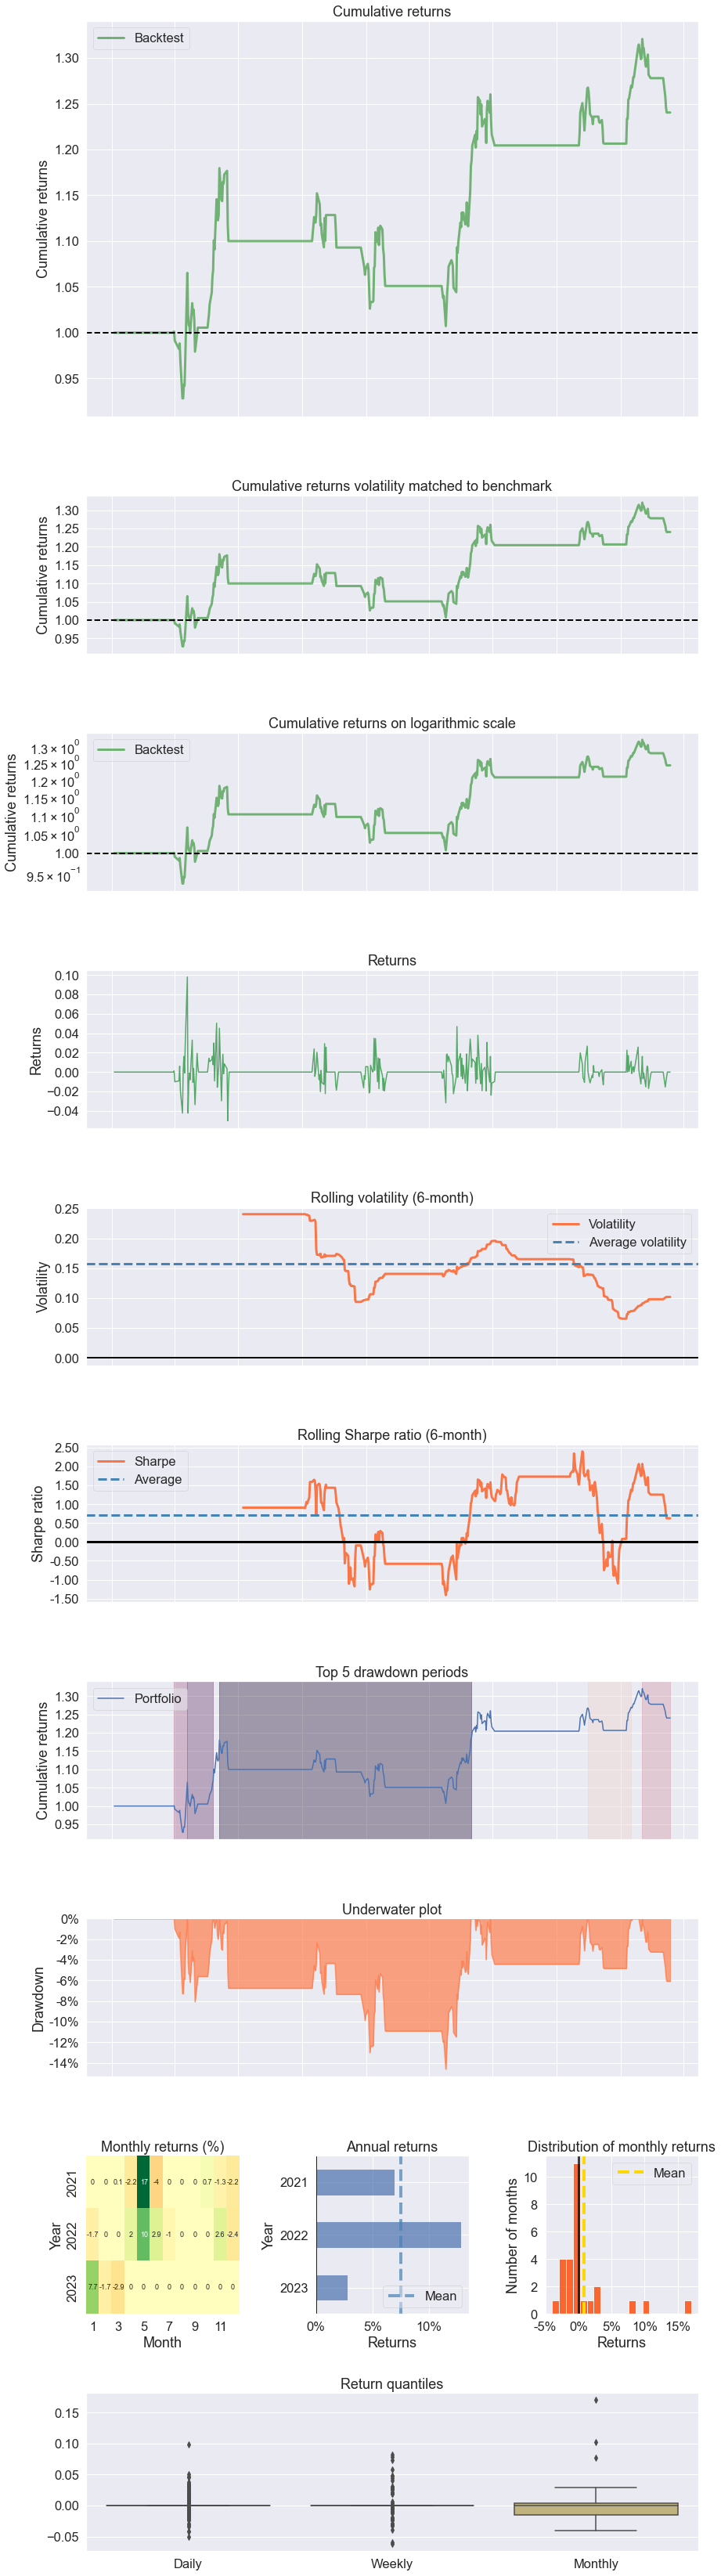

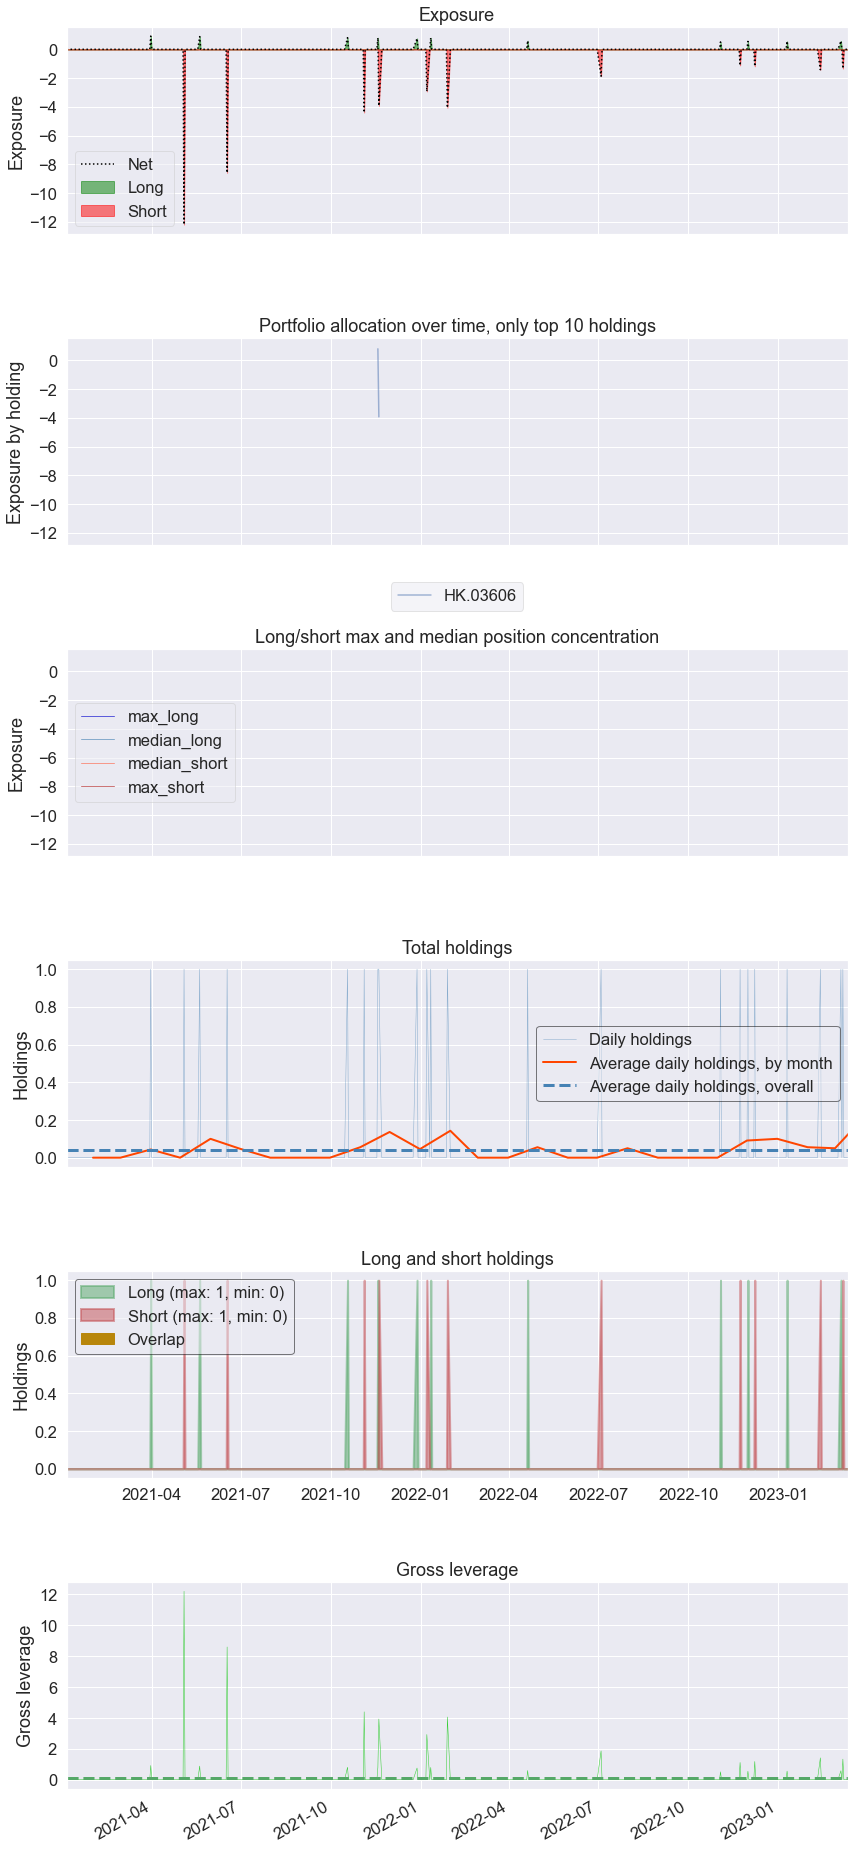

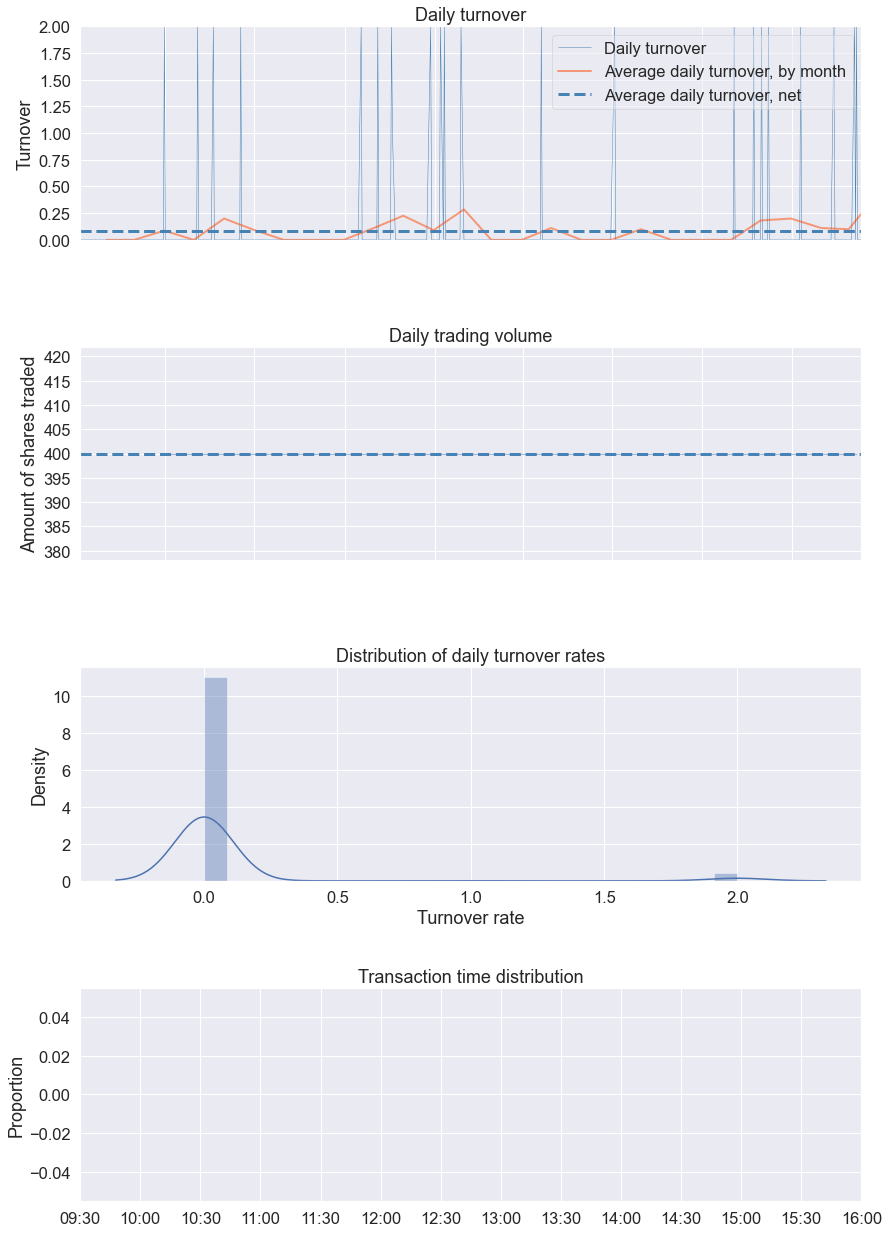

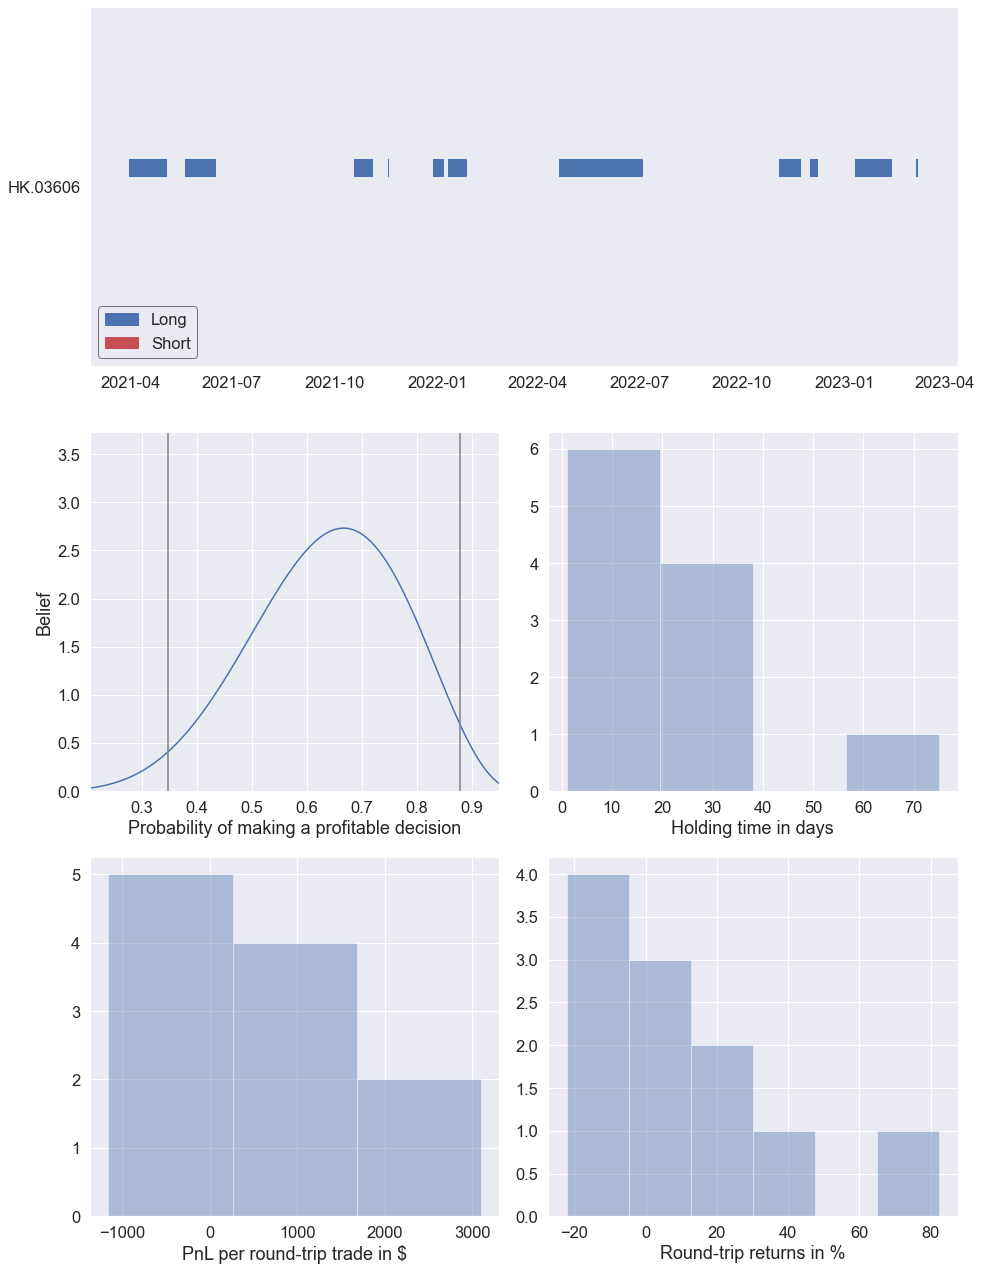

In [30]:
%matplotlib inline

# stake = 1000

# code = "HK.03606"
# code = "HK.01316"
# HK.01316
strat_params_01316 = dict(stock_code="HK.01316", stake=1000, fastk_period=7, rsi_period=5, stop_loss=0.6, start_time="2022-01-01")

# HK.03606  
strat_params_03606 = dict(stock_code="HK.03606", stake=400)


# 海底捞
strat_params_06862 = dict(stock_code="HK.06862", stake=1000, fastk_period=7, rsi_period=5, cash=30000, start_time="2022-01-01")

# 龙湖集团
strat_params_00960 = dict(stock_code="HK.00960", stake=500)

# 华润万象生活
strat_params_01209 = dict(stock_code="HK.01209", stake=200, fastk_period=7, rsi_period=5, start_time="2022-01-01")

# 敏实集团
strat_params_00425 = dict(stock_code="HK.00425", stake=2000, cash=50000)

# HK.00241 AliHealth
strat_params_00241 = dict(stock_code="HK.00241", stake=2000, fastk_period=7, rsi_period=5, stop_loss=0.5, start_time="2022-01-01")

# HK.00293 Cathy Pacific
strat_params_00293 = dict(stock_code="HK.00293", stake=1000)

cerebro = runstrategy(**strat_params_03606)
cerebro

2021-02-10T00:00:00, cash: 50000.00
2021-02-10T00:00:00, Data HK.01316 Close: 12.80
2021-02-10T00:00:00, 0028 - 2021-02-10 - Data Position Size:  00 - Value 50000.00
2021-02-10T00:00:00, slowk: 29.15, slowd: 21.34, rsi: 57.11, macd: 0.95, macdsignal: 1.41 
2021-02-10T00:00:00, rsi over mid: True
2021-02-10T00:00:00, rsi under mid : True
2021-02-10T00:00:00, overbought: False
2021-02-10T00:00:00, oversold: True
2021-02-10T00:00:00, macd over macdsignal: False
2021-02-10T00:00:00, macd under macdsignal: True
2021-02-10T00:00:00, cash: 50000.00
2021-02-10T00:00:00, Data HK.03606 Close: 62.00
2021-02-10T00:00:00, 0028 - 2021-02-10 - Data Position Size:  00 - Value 50000.00
2021-02-10T00:00:00, slowk: 86.56, slowd: 72.37, rsi: 71.88, macd: 3.55, macdsignal: 3.79 
2021-02-10T00:00:00, rsi over mid: True
2021-02-10T00:00:00, rsi under mid : False
2021-02-10T00:00:00, overbought: False
2021-02-10T00:00:00, oversold: False
2021-02-10T00:00:00, macd over macdsignal: False
2021-02-10T00:00:00, ma

2021-08-25T00:00:00, slowk: 38.86, slowd: 26.27, rsi: 43.43, macd: -1.51, macdsignal: -1.30 
2021-08-25T00:00:00, rsi over mid: False
2021-08-25T00:00:00, rsi under mid : True
2021-08-25T00:00:00, overbought: False
2021-08-25T00:00:00, oversold: True
2021-08-25T00:00:00, macd over macdsignal: False
2021-08-25T00:00:00, macd under macdsignal: True
2021-08-26T00:00:00, cash: 56419.30
2021-08-26T00:00:00, Data HK.01316 Close: 8.55
2021-08-26T00:00:00, 0161 - 2021-08-26 - Data Position Size:  00 - Value 56419.30
2021-08-26T00:00:00, slowk: 22.05, slowd: 17.45, rsi: 31.40, macd: -0.47, macdsignal: -0.32 
2021-08-26T00:00:00, rsi over mid: False
2021-08-26T00:00:00, rsi under mid : True
2021-08-26T00:00:00, overbought: False
2021-08-26T00:00:00, oversold: True
2021-08-26T00:00:00, macd over macdsignal: False
2021-08-26T00:00:00, macd under macdsignal: True
2021-08-26T00:00:00, cash: 56419.30
2021-08-26T00:00:00, Data HK.03606 Close: 46.30
2021-08-26T00:00:00, 0161 - 2021-08-26 - Data Positio

2022-02-24T00:00:00, Data HK.01316 Close: 7.85
2022-02-24T00:00:00, 0283 - 2022-02-24 - Data Position Size:  00 - Value 58558.45
2022-02-24T00:00:00, slowk: 24.97, slowd: 22.12, rsi: 30.05, macd: -0.37, macdsignal: -0.34 
2022-02-24T00:00:00, rsi over mid: False
2022-02-24T00:00:00, rsi under mid : True
2022-02-24T00:00:00, overbought: False
2022-02-24T00:00:00, oversold: True
2022-02-24T00:00:00, macd over macdsignal: False
2022-02-24T00:00:00, macd under macdsignal: True
2022-02-24T00:00:00, cash: 58558.45
2022-02-24T00:00:00, Data HK.03606 Close: 39.30
2022-02-24T00:00:00, 0283 - 2022-02-24 - Data Position Size:  00 - Value 58558.45
2022-02-24T00:00:00, slowk: 30.34, slowd: 30.78, rsi: 35.66, macd: -0.59, macdsignal: -0.33 
2022-02-24T00:00:00, rsi over mid: False
2022-02-24T00:00:00, rsi under mid : True
2022-02-24T00:00:00, overbought: False
2022-02-24T00:00:00, oversold: False
2022-02-24T00:00:00, macd over macdsignal: False
2022-02-24T00:00:00, macd under macdsignal: True
2022-0

2022-09-06T00:00:00, overbought: False
2022-09-06T00:00:00, oversold: False
2022-09-06T00:00:00, macd over macdsignal: True
2022-09-06T00:00:00, macd under macdsignal: False
2022-09-06T00:00:00, Data HK.03606 SELL SIGNAL!
2022-09-07T00:00:00, cash: 57967.79
2022-09-07T00:00:00, Data HK.01316 Close: 5.57
2022-09-07T00:00:00, 0415 - 2022-09-07 - Data Position Size:  00 - Value 57967.79
2022-09-07T00:00:00, slowk: 26.97, slowd: 17.86, rsi: 34.17, macd: -0.21, macdsignal: -0.15 
2022-09-07T00:00:00, rsi over mid: False
2022-09-07T00:00:00, rsi under mid : True
2022-09-07T00:00:00, overbought: False
2022-09-07T00:00:00, oversold: True
2022-09-07T00:00:00, macd over macdsignal: False
2022-09-07T00:00:00, macd under macdsignal: True
2022-09-07T00:00:00, cash: 57967.79
2022-09-07T00:00:00, Data HK.03606 Close: 38.45
2022-09-07T00:00:00, 0415 - 2022-09-07 - Data Position Size:  00 - Value 57967.79
2022-09-07T00:00:00, slowk: 69.27, slowd: 66.11, rsi: 57.99, macd: -0.02, macdsignal: -0.25 
2022-

2023-02-10T00:00:00, HK.03606 - 2023-02-10 - OrderNo: Ref: 66
OrdType: 1
OrdType: Sell
Status: 1
Status: Submitted
Size: -800
Price: None
Price Limit: None
TrailAmount: None
TrailPercent: None
ExecType: 0
ExecType: Market
CommInfo: None
End of Session: 738561.9999999999
Info: AutoOrderedDict()
Broker: None
Alive: True - Order Target Percent: 0.00
2023-02-13T00:00:00, OPERATION PROFIT, GROSS 2920.00, NET 2889.83
2023-02-13T00:00:00, cash: 64576.78
2023-02-13T00:00:00, Data HK.01316 Close: 5.98
2023-02-13T00:00:00, 0520 - 2023-02-13 - Data Position Size:  00 - Value 64576.78
2023-02-13T00:00:00, slowk: 45.29, slowd: 38.87, rsi: 52.14, macd: 0.14, macdsignal: 0.16 
2023-02-13T00:00:00, rsi over mid: True
2023-02-13T00:00:00, rsi under mid : True
2023-02-13T00:00:00, overbought: False
2023-02-13T00:00:00, oversold: False
2023-02-13T00:00:00, macd over macdsignal: False
2023-02-13T00:00:00, macd under macdsignal: True
2023-02-13T00:00:00, cash: 64576.78
2023-02-13T00:00:00, Data HK.03606 Cl

Start date,2021-01-04
End date,2023-03-13
Total months,25
,Backtest
Annual return,10.498%
Cumulative returns,23.853%
Annual volatility,14.883%
Sharpe ratio,0.75
Calmar ratio,0.80
Stability,0.57
Max drawdown,-13.048%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.05,2021-06-11,2022-04-25,2023-01-12,415
1,6.05,2023-02-02,2023-03-10,NaT,NaN
2,5.64,2021-03-17,2021-04-07,2021-05-25,50
3,3.07,2023-01-27,2023-01-31,2023-02-01,4
4,2.25,2021-06-04,2021-06-08,2021-06-10,5


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


Top 10 long positions of all time,max
HK.03606,91.73%


Top 10 short positions of all time,max


Top 10 positions of all time,max
HK.03606,91.73%


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\pyfolio\tears.py:755: UserWarning: Unable to generate turnover plot.
  warnings.warn('Unable to generate turnover plot.', UserWarning)


Summary stats,All trades,Long trades
Total number of round_trips,24.00,24.00
Percent profitable,0.50,0.50
Winning round_trips,12.00,12.00
Losing round_trips,12.00,12.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$12650.00,$12650.00
Gross profit,$23830.00,$23830.00
Gross loss,$-11180.00,$-11180.00
Profit factor,$2.13,$2.13
Avg. trade net profit,$527.08,$527.08
Avg. winning trade,$1985.83,$1985.83
Avg. losing trade,$-931.67,$-931.67
Ratio Avg. Win:Avg. Loss,$2.13,$2.13
Largest winning trade,$6960.00,$6960.00
Largest losing trade,$-1720.00,$-1720.00


Duration stats,All trades,Long trades
Avg duration,12 days 06:00:00,12 days 06:00:00
Median duration,7 days 12:00:00,7 days 12:00:00
Longest duration,34 days 00:00:00,34 days 00:00:00
Shortest duration,2 days 00:00:00,2 days 00:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,0.67%,0.67%
Avg returns winning,3.36%,3.36%
Avg returns losing,-2.02%,-2.02%
Median returns all round_trips,0.12%,0.12%
Median returns winning,2.90%,2.90%
Median returns losing,-1.78%,-1.78%
Largest winning trade,11.95%,11.95%
Largest losing trade,-5.80%,-5.80%


Symbol stats,HK.01316,HK.03606
Avg returns all round_trips,0.72%,0.62%
Avg returns winning,3.64%,3.08%
Avg returns losing,-1.79%,-2.34%
Median returns all round_trips,-0.31%,1.61%
Median returns winning,2.22%,2.90%
Median returns losing,-1.55%,-1.96%
Largest winning trade,11.95%,4.51%
Largest losing trade,-5.80%,-3.90%


Profitability (PnL / PnL total) per name,
symbol,
HK.01316,83.24%
HK.03606,16.76%


C:\personal\dev\python\btstrats_venv_py364\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


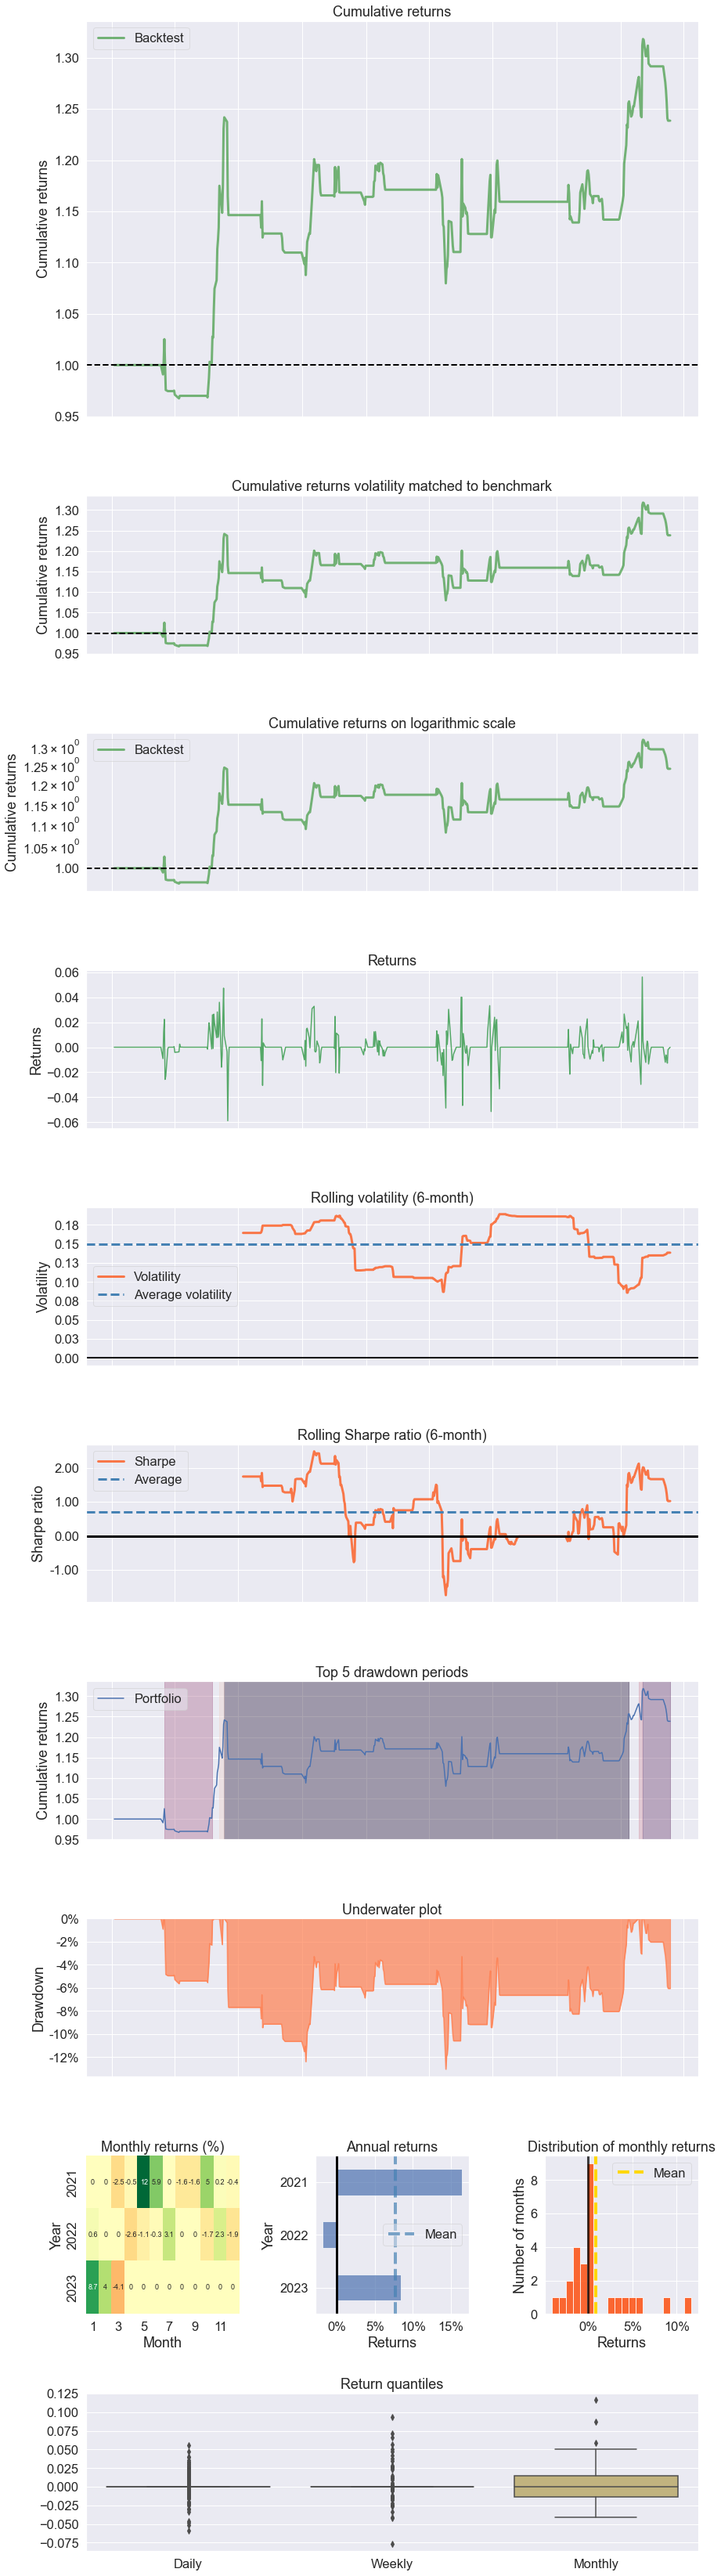

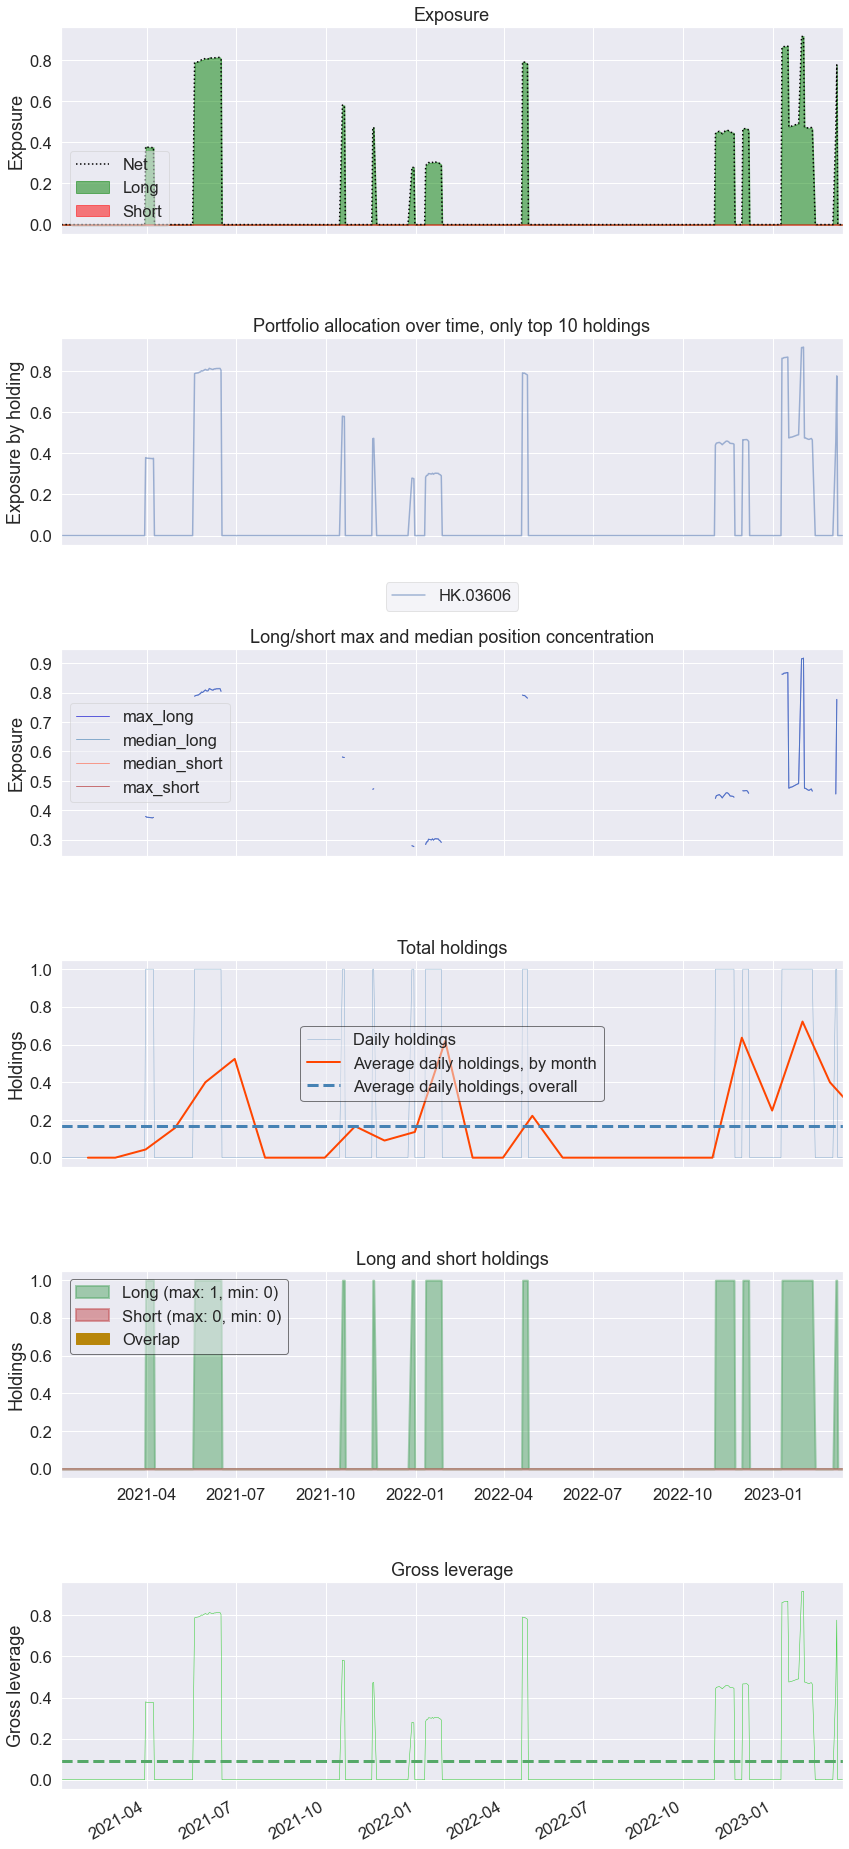

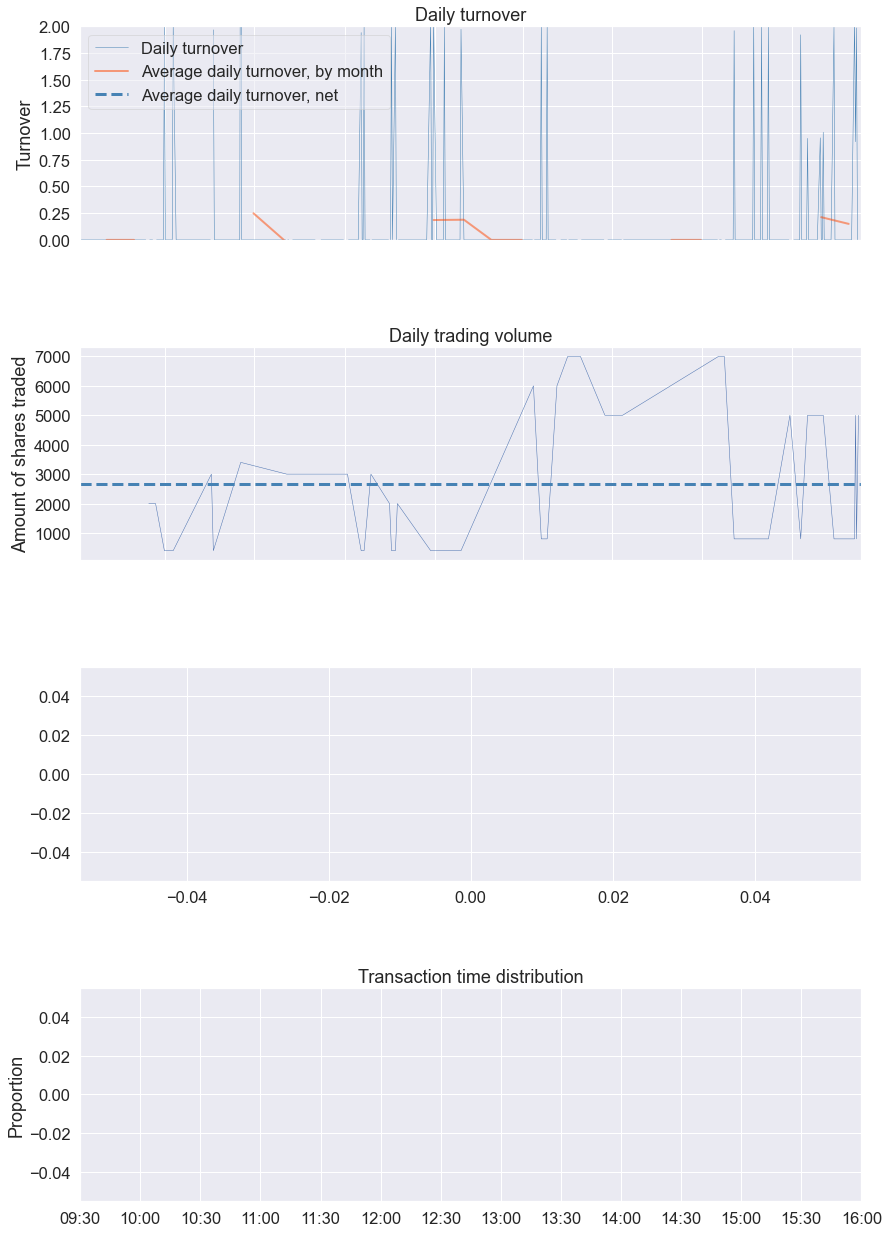

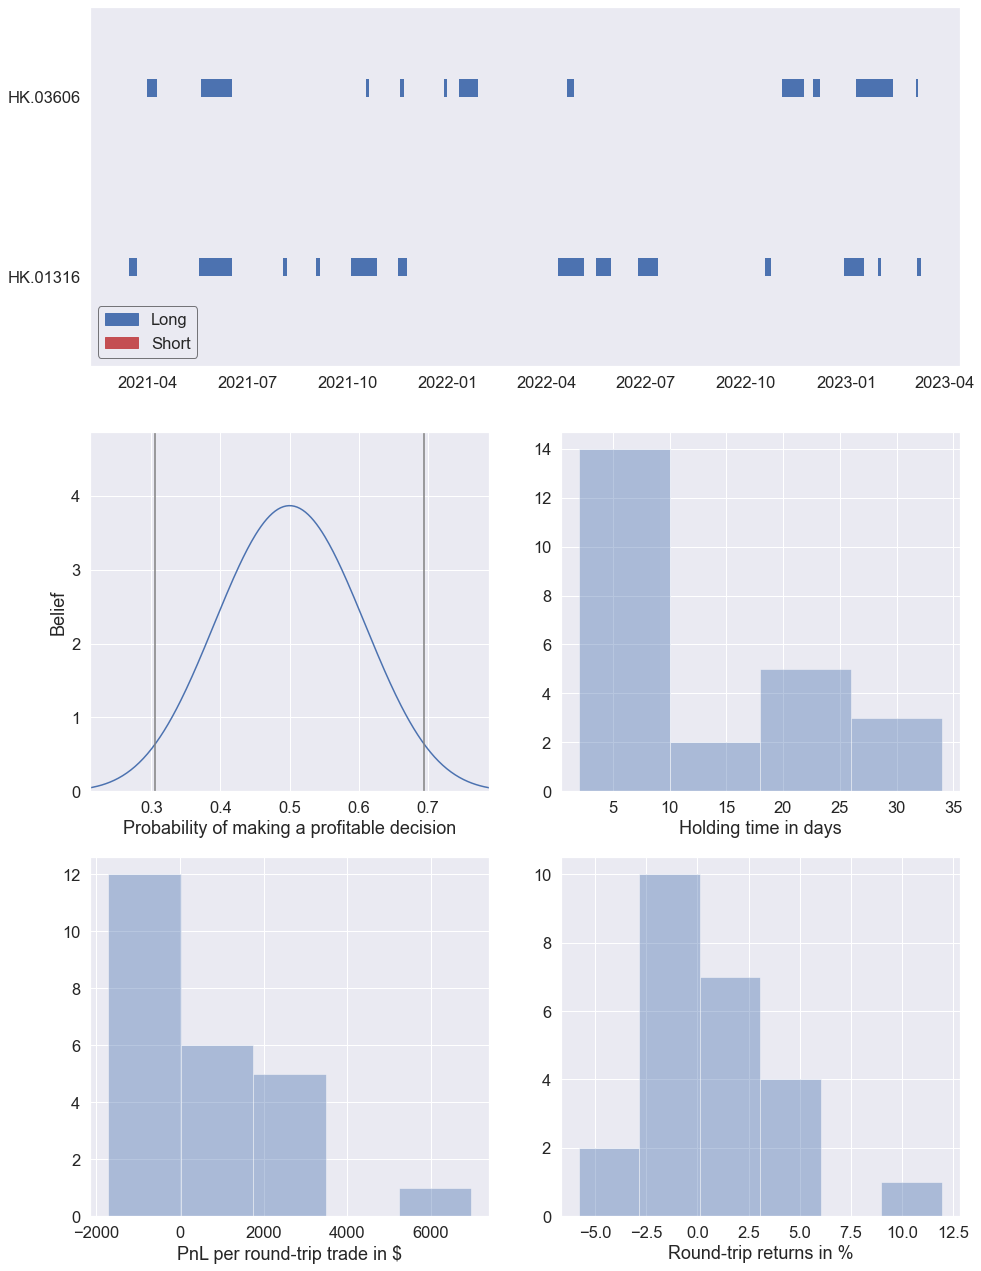

In [31]:
import json

stock_codes = ['HK.01316', 'HK.03606']
# stock_codes = ['HK.01316']
stakes = {
    'HK.01316': 1000,
    'HK.03606': 400
}
stakes = OrderedDict(stakes)
ind_periods = OrderedDict(params)

strat_params = dict(stock_codes=stock_codes, stakes=stakes, fastk_period=7, rsi_period=5, stop_loss=0.6, ind_periods=ind_periods, cash=50000)
multicerebro = run_multistock_strategy(**strat_params)
multicerebro


In [32]:
quote_context.close()
trade_context.close()

2023-03-13 17:55:54,684 | 6472 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=1
2023-03-13 17:55:54,688 | 6472 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=2
